# Multi lingual embeddings visualization

## Loading embeddings

In [1]:
from multilingual_embeddings import MultiLingualEmbeddings

multi_embs = MultiLingualEmbeddings()
multilingual_dictionaries, dictionaries = multi_embs.load_dictionaries()
fr_dictionary = dictionaries['fr']
de_dictionary = dictionaries['de']
fr_dictionary_mll = multilingual_dictionaries['fr']
de_dictionary_mll = multilingual_dictionaries['de']

reading word vectors from /Users/agnesmustar/0dac/multilingual_model/data/fastext/fr/fr.vec
reading word vectors from /Users/agnesmustar/0dac/multilingual_model/data/fastext/de/de.vec


## Mono lingual

CPU times: user 49min 6s, sys: 1min 1s, total: 50min 8s
Wall time: 51min 7s


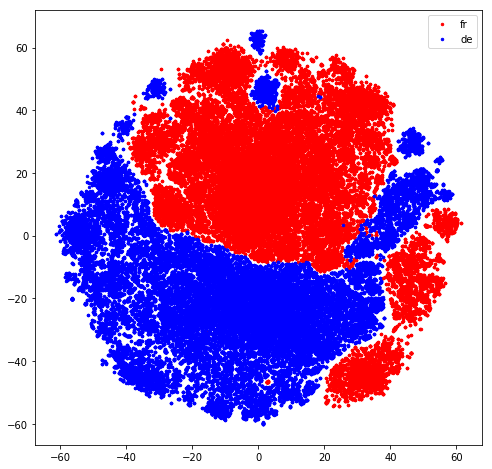

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


def plot_embs(emb1, emb2, languages=['fr', 'de']):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(emb1[:,0], emb1[:,1], color="red",  s=6, label=languages[0])
    plt.scatter(emb2[:,0], emb2[:,1], color="blue", s=6, label=languages[1])
    #plt.title('t-SNE applies on monolingual embeddings')
    plt.legend()
    
def visualize_language(emb1, emb2, languages=['fr', 'de']):
    N = 50000
    
    #emb1 = emb1[:N]
    #emb2 = emb2[:N]
    idx = np.random.choice(np.array(range(N)), N)
    emb1 = emb1[idx]
    emb2 = emb2[idx]

    embs = np.concatenate([emb1, emb2])

    pca = PCA(n_components=50)
    data_pca = pca.fit_transform(embs)
    data_tsne = TSNE().fit_transform(data_pca)
    
    data_tsne_1 = data_tsne[:N]
    data_tsne_2 = data_tsne[N:]

    plot_embs(data_tsne_1, data_tsne_2, languages)
    
    
%time visualize_language(fr_dictionary.embed, de_dictionary.embed)

## Multi lingual

CPU times: user 52min 48s, sys: 1min 2s, total: 53min 50s
Wall time: 54min 23s


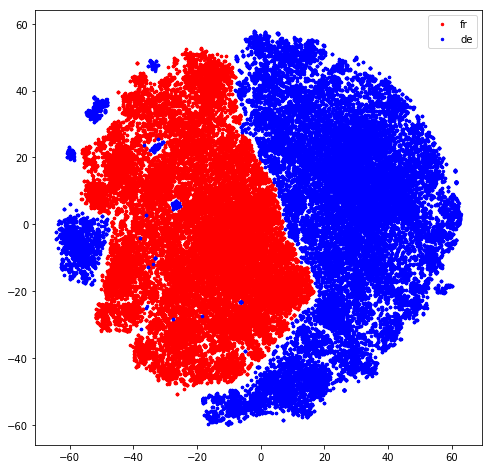

In [3]:
%time visualize_language(fr_dictionary_mll.embed, de_dictionary_mll.embed)

In [4]:
#KNN

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(data_tsne)

word = 'nord'
word_emb = data_tsne[fr_dictionary.word2id[word]]
nearest_idx = neigh.kneighbors(np.expand_dims(word_emb, axis=0), return_distance=False)

NameError: name 'data_tsne' is not defined